In [94]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import find_peaks

from process_video_to_tracks import process_video_to_tracks
from transform_coordinates import transform_coordinates
from smooth_data import smooth_data
from label_decision import label_decision
from trial_analysis import trial_analysis
from get_kinematic_features import get_displacement
from get_kinematic_features import get_velocity
from get_kinematic_features import get_acceleration
from straight_walking_speed import plot_straight_walking_speed

In [95]:
h5_folder = '/Users/yang/Documents/Wilbrecht_Lab/SLEAP_Analysis'

df = transform_coordinates(h5_folder)

In [96]:
df.describe()

,Head x,Head y,Neck x,Neck y,Torso x,Torso y,Tailhead x,Tailhead y,warped Head x,warped Head y,warped Neck x,warped Neck y,warped Torso x,warped Torso y,warped Tailhead x,warped Tailhead y
count,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000,56655.000000
mean,197.236600,115.130751,197.045809,115.440501,196.554374,115.879194,195.866695,116.578054,297.666374,48.682059,295.797925,50.902230,292.421161,55.781071,288.969700,61.426586
std,37.810802,33.554196,36.938531,32.870174,36.506003,32.574270,37.756837,33.754085,34.350580,28.259247,31.200807,29.915182,25.451864,33.124993,20.449178,36.296596
min,60.893322,-136.341296,55.794579,-132.967207,47.423157,-14.887220,39.148140,-20.131970,141.408719,2.901488,142.357514,7.681706,148.806419,13.270311,156.080514,8.554547
25%,180.353523,96.408344,180.212418,99.312248,179.639923,100.388756,179.424866,103.200245,288.569892,32.591164,288.459402,33.260044,288.074693,33.161589,286.352515,33.612055
50%,199.272369,120.029198,198.890564,119.531059,196.735580,118.984100,196.684235,116.921814,299.842063,38.346508,297.779367,38.246806,295.058787,40.734873,291.575129,47.308479
75%,212.485802,136.016144,212.595848,135.370552,212.720238,132.656311,212.152992,131.246399,323.292982,53.682482,318.754442,59.231293,308.296814,70.460627,299.300061,81.472742
max,344.125275,236.195923,342.983795,242.423416,341.010468,244.463837,352.467377,244.844238,356.358706,281.964223,349.622115,278.829930,344.045810,174.457870,340.603791,179.449924


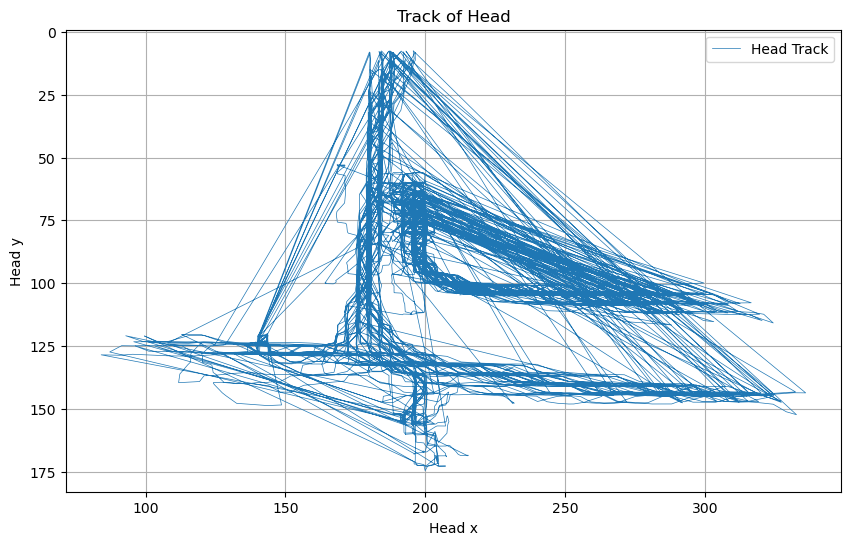

In [97]:
start_frame, stop_frame = 0000, 8000
head_x = df['Head x'][start_frame:stop_frame]
head_y = df['Head y'][start_frame:stop_frame]

plt.figure(figsize=(10, 6))
plt.plot(head_x, head_y, linestyle='-', linewidth=0.5, label='Head Track')
plt.xlabel('Head x')
plt.ylabel('Head y')
plt.title('Track of Head')
plt.legend()
plt.grid(True)

# Invert y-axis to match the video coordinate system
plt.gca().invert_yaxis()

plt.show()

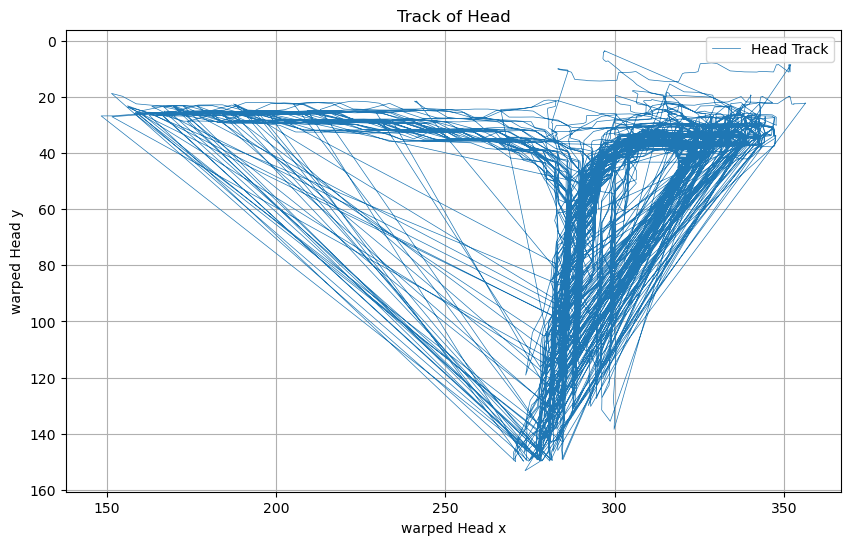

In [98]:
start_frame, stop_frame = 0000, 8000
head_x = df['warped Head x'][start_frame:stop_frame]
head_y = df['warped Head y'][start_frame:stop_frame]

plt.figure(figsize=(10, 6))
plt.plot(head_x, head_y, linestyle='-', linewidth=0.5, label='Head Track')
plt.xlabel('warped Head x')
plt.ylabel('warped Head y')
plt.title('Track of Head')
plt.legend()
plt.grid(True)

# Invert y-axis to match the video coordinate system
plt.gca().invert_yaxis()

plt.show()

In [99]:

'''
plot_df = df[1:400]
x = np.linspace(1, len(df), len(df))
sns.lineplot(data=plot_df, x=plot_df.index, y='Head yCoordinates')
plt.title('Head Y-Coordinate Over Time')
plt.xlabel('Frames')
plt.ylabel('Head Y-Coordinate')
#plt.xlim(0, )
plt.grid(True)
plt.show()
'''

"\nplot_df = df[1:400]\nx = np.linspace(1, len(df), len(df))\nsns.lineplot(data=plot_df, x=plot_df.index, y='Head yCoordinates')\nplt.title('Head Y-Coordinate Over Time')\nplt.xlabel('Frames')\nplt.ylabel('Head Y-Coordinate')\n#plt.xlim(0, )\nplt.grid(True)\nplt.show()\n"

In [100]:
'''
smoothed_data = {}
x = len(df)
grid = np.linspace(1, x, x)

for column in df.columns:
    y = df[column]
    spline = make_smoothing_spline(grid, y)
    smoothed_data[column] = spline(grid)

smoothed_df = pd.DataFrame(smoothed_data, index=df.index)

smoothed_df.head(20)
'''

'\nsmoothed_data = {}\nx = len(df)\ngrid = np.linspace(1, x, x)\n\nfor column in df.columns:\n    y = df[column]\n    spline = make_smoothing_spline(grid, y)\n    smoothed_data[column] = spline(grid)\n\nsmoothed_df = pd.DataFrame(smoothed_data, index=df.index)\n\nsmoothed_df.head(20)\n'

In [101]:
'''
#plt.figure(figsize=(15, 6))
sns.lineplot(data=smoothed_data['Head yCoordinates'][:400])
'''

"\n#plt.figure(figsize=(15, 6))\nsns.lineplot(data=smoothed_data['Head yCoordinates'][:400])\n"

In [102]:
'''
# Extracting the data to be analyzed
data = df['Head yCoordinates']

# Detecting peaks
peaks, _ = find_peaks(data)

# Extracting peak values
peak_values = data[peaks]

# Plotting the data with peaks highlighted
plt.figure(figsize=(15, 6))
sns.lineplot(data=data)
plt.plot(peaks, peak_values, "x")  # Highlight peaks with 'x'
plt.show()
'''

'\n# Extracting the data to be analyzed\ndata = df[\'Head yCoordinates\']\n\n# Detecting peaks\npeaks, _ = find_peaks(data)\n\n# Extracting peak values\npeak_values = data[peaks]\n\n# Plotting the data with peaks highlighted\nplt.figure(figsize=(15, 6))\nsns.lineplot(data=data)\nplt.plot(peaks, peak_values, "x")  # Highlight peaks with \'x\'\nplt.show()\n'

In [103]:
# Smooth the data
columns_to_smooth = [
    'warped Head x', 'warped Head y',
    'warped Neck x', 'warped Neck y',
    'warped Torso x', 'warped Torso y',
    'warped Tailhead x', 'warped Tailhead y'
]

smoothed_df = smooth_data(df, columns_to_smooth)

In [104]:
smoothed_df.describe()

,Head x,Head y,Neck x,Neck y,Torso x,Torso y,Tailhead x,Tailhead y,warped Head x,warped Head y,warped Neck x,warped Neck y,warped Torso x,warped Torso y,warped Tailhead x,warped Tailhead y,Elapsed Time
count,47530.000000,47530.000000,47530.000000,47530.000000,47530.000000,47530.000000,47530.000000,47530.000000,47530.000000,47530.000000,47530.000000,47530.000000,47530.000000,47530.000000,47530.000000,47530.000000,47530.000000
mean,197.515859,116.436259,197.135554,116.579447,196.226226,116.745648,195.113102,117.242533,296.666970,50.519991,294.926996,52.794998,291.759027,57.746185,288.479184,63.424240,0.861206
std,39.347651,34.292247,38.506143,33.921445,38.036295,34.135602,39.166258,35.696391,34.963505,29.883054,31.807205,31.629358,26.006677,34.890103,20.961527,38.030839,0.601283
min,60.893322,-136.341296,55.794579,-132.967207,47.423157,-14.887220,39.148140,-20.131970,140.835948,3.097001,144.206723,7.612915,150.909724,13.120307,160.788875,10.816409,0.000000
25%,179.981339,99.725590,179.934559,100.307837,179.433270,100.839615,179.263783,103.365442,287.882306,32.859129,287.633845,33.345211,287.276551,33.199948,286.064033,33.760849,0.400000
50%,199.151276,120.553394,196.819069,120.079010,196.604050,119.783390,196.529709,119.567211,298.769523,38.752687,296.609418,38.756905,294.765432,41.097164,291.467594,48.702294,0.800000
75%,215.085209,136.716438,212.936050,136.030457,212.776241,135.271000,211.951653,131.596535,323.105780,58.730436,318.596288,64.387826,308.164434,75.805050,298.961715,86.779880,1.233333
max,344.125275,236.195923,342.983795,242.423416,341.010468,244.463837,352.467377,244.844238,354.245071,281.964224,347.833900,278.829928,344.023095,174.607316,340.603829,179.601113,4.700000


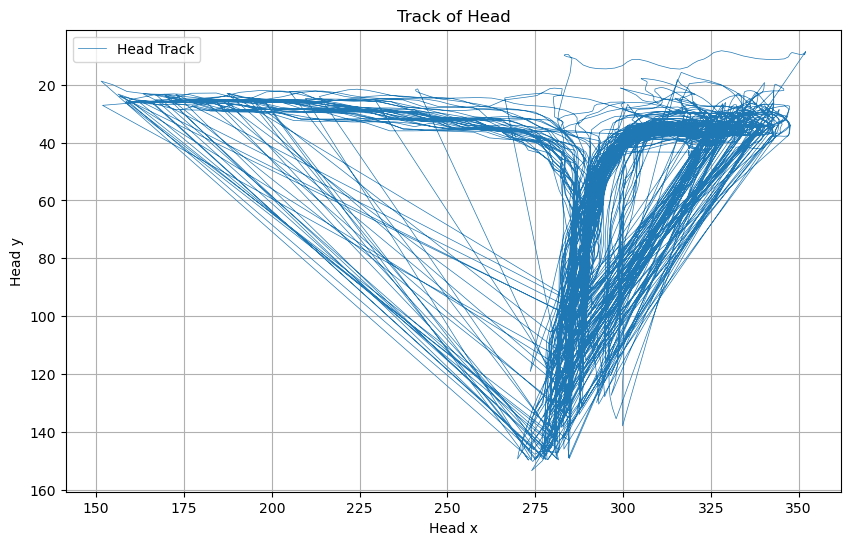

In [105]:
start_frame, stop_frame = 0000, 7000
head_x = smoothed_df['warped Head x'][start_frame:stop_frame]
head_y = smoothed_df['warped Head y'][start_frame:stop_frame]

plt.figure(figsize=(10, 6))
plt.plot(head_x, head_y, linestyle='-', linewidth=0.5, label='Head Track')
plt.xlabel('Head x')
plt.ylabel('Head y')
plt.title('Track of Head')
plt.legend()
plt.grid(True)

# Invert y-axis to match the video coordinate system
plt.gca().invert_yaxis()

plt.show()

In [106]:
labeled_df = label_decision(smoothed_df)

In [107]:
labeled_df.head()

,Head x,Head y,Neck x,Neck y,Torso x,Torso y,Tailhead x,Tailhead y,warped Head x,warped Head y,warped Neck x,warped Neck y,warped Torso x,warped Torso y,warped Tailhead x,warped Tailhead y,Elapsed Time,decision
0,280.655884,103.900528,287.523102,101.042740,299.204010,100.274368,311.114014,100.632660,288.795313,112.502517,291.434852,118.950001,292.439284,129.982656,291.695481,141.005628,0.000000,None
1,276.369812,104.058960,283.204681,103.355186,295.066620,100.617088,304.979675,102.976753,288.771558,108.408742,290.051113,114.193846,292.247792,125.226643,289.137712,135.266350,0.033333,None
2,271.853394,104.155304,276.696289,103.611404,288.414703,100.563377,300.044769,100.752357,288.701541,104.326269,289.291565,109.503944,292.516324,120.501065,291.891907,130.670079,0.066667,None
3,267.684143,104.538757,272.357605,103.712852,284.094879,100.099968,295.804962,99.863083,288.441322,100.395794,289.014365,105.121609,293.113780,116.111906,293.062162,126.716040,0.100000,None
4,263.628418,104.858932,268.296967,104.008766,280.046204,100.079124,291.656830,99.572060,288.210387,96.639830,288.917446,101.074858,293.361135,112.109098,293.529058,122.863666,0.133333,None


In [108]:
# calculate velocity
bodyparts = [
    'Head',
    'Neck',
    'Torso',
    'Tailhead'
]

displacement_df = get_displacement(smoothed_df, bodyparts)
velocity_df = get_velocity(displacement_df, bodyparts, frame_rate=30)
acceleration_df = get_acceleration(velocity_df, bodyparts, frame_rate=30)

In [123]:
acceleration_df.head()

,Head x,Head y,Neck x,Neck y,Torso x,Torso y,Tailhead x,Tailhead y,warped Head x,warped Head y,...,Torso displacement,Tailhead displacement,Head velocity,Neck velocity,Torso velocity,Tailhead velocity,Head acceleration,Neck acceleration,Torso acceleration,Tailhead acceleration
0,280.655884,103.900528,287.523102,101.042740,299.204010,100.274368,311.114014,100.632660,288.795313,112.502517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3684.459702,4458.020968,4283.879629,5655.087345
1,276.369812,104.058960,283.204681,103.355186,295.066620,100.617088,304.979675,102.976753,288.771558,108.408742,...,4.759866,6.283430,122.815323,148.600699,142.795988,188.502911,-9.693810,-182.111616,-23.998242,-832.624173
2,271.853394,104.155304,276.696289,103.611404,288.414703,100.563377,300.044769,100.752357,288.701541,104.326269,...,4.733202,5.358292,122.492196,142.530312,141.996046,160.748772,-129.594150,-323.925652,-273.209600,-1111.240217
3,267.684143,104.538757,272.357605,103.712852,284.094879,100.099968,295.804962,99.863083,288.441322,100.395794,...,4.429635,4.123581,118.172391,131.732790,132.889060,123.707432,-158.420882,-308.863867,-377.272344,-218.714975
4,263.628418,104.858932,268.296967,104.008766,280.046204,100.079124,291.656830,99.572060,288.210387,96.639830,...,4.010444,3.880564,112.891695,121.437328,120.313315,116.416933,-40.417485,-147.090352,-108.241905,-225.508554


In [109]:
trial_df = trial_analysis(acceleration_df)

In [110]:
trial_df.head()

,trial_num,final_decision
0,0,Acc
1,1,Acc
2,2,Acc
3,3,Acc
4,4,Acc


In [111]:
def straight_walking_speed(df, speed_threshold=500):
    """
    Extracts the straight walking speed (before T-entry) for each trial.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame with columns 'Elapsed Time', 'decision', and 'Head velocity'.
    
    Returns:
    list: A list of DataFrames, each containing the straight walking speed for one trial.
    """
    trials = []
    current_trial = []
    in_trial = False

    for index, row in df.iterrows():
        decision = row['decision']
        speed = row['Head velocity']

        if decision == 'T-entry' and in_trial:
            # End the current trial at T-entry
            if current_trial:
                trials.append(pd.DataFrame({'speed': current_trial}))
            current_trial = []
            in_trial = False

        if decision is None:
            in_trial = True
            if speed < speed_threshold:
                current_trial.append(speed)
                
    # Append the last trial if it was not followed by a T-entry
    if current_trial:
        trials.append(pd.DataFrame({'speed': current_trial}))

    return trials

In [112]:
def straight_walking_speed_profile(df, speed_threshold=500, length_threshold=12):
    """
    Extracts and normalizes the straight walking speed (before T-entry) for each trial.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame with columns 'Elapsed Time', 'decision', and 'Head velocity'.
    speed_threshold (float): The threshold above which speeds are considered outliers and are filtered out.
    target_length (int): The target length for normalization. Profiles shorter than this are excluded.
    
    Returns:
    pandas.DataFrame: A DataFrame where each row represents a normalized speed profile of a trial.
    """
    trials = []
    current_trial = []
    in_trial = False

    for index, row in df.iterrows():
        decision = row['decision']
        speed = row['Head velocity']

        if decision == 'T-entry' and in_trial:
            # End the current trial at T-entry
            if len(current_trial) >= length_threshold:
                # Use the last 12 speed values as the profile
                normalized_profile = current_trial[-length_threshold:]
                trials.append(normalized_profile)
            current_trial = []
            in_trial = False

        if decision is None:
            in_trial = True
            if speed < speed_threshold:
                current_trial.append(speed)

    # Append the last trial if it was not followed by a T-entry
    if len(current_trial) >= length_threshold:
        normalized_profile = current_trial[-length_threshold:]
        trials.append(normalized_profile)

    # Convert the list of lists to a DataFrame
    normalized_df = pd.DataFrame(trials, columns=[f'speed_{i+1}' for i in range(length_threshold)])

    return normalized_df


In [127]:
import pandas as pd
import numpy as np

def trial_profile(df, speed_threshold=500, length_threshold=12, coord_length=13):
    """
    Extracts the final decision for each trial and the last 13 coordinates before each decision
    from the labeled DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the labeled data with decisions.
    speed_threshold (float): The threshold above which speeds are considered outliers and are filtered out.
    length_threshold (int): The target length for normalization of speed profiles. Profiles shorter than this are excluded.
    coord_length (int): The number of coordinate points to extract before each decision.
    
    Returns:
    pandas.DataFrame: A DataFrame with each row representing a trial, containing columns
                      for the trial number, speed profile, coordinate data, and the final decision.
    """
    trial_num = 0
    current_decision = None
    
    trials = []
    current_trial_speeds = []
    current_trial_coords = []

    for index, row in df.iterrows():
        y = row['warped Head y']
        decision = row['decision']
        speed = row['Head velocity']
        head_x = row['warped Head x']
        head_y = row['warped Head y']
        
        if decision is not None:
            current_decision = decision    
            
        if current_decision is not None and y > 90:  # End of current trial and start of a new trial
            trial_num += 1
            
            if len(current_trial_speeds) >= length_threshold and len(current_trial_coords) >= coord_length * 2:
                # Use the last `length_threshold` speed values and `coord_length` coordinates as the profile
                normalized_speeds = current_trial_speeds[-length_threshold:]
                normalized_coords = current_trial_coords[-(coord_length * 2):]
                trials.append([trial_num, normalized_speeds, normalized_coords, current_decision])
                
            current_trial_speeds = []
            current_trial_coords = []
            current_decision = None
            
        if decision is None:
            if speed < speed_threshold:
                current_trial_speeds.append(speed)
                current_trial_coords.append(head_x)
                current_trial_coords.append(head_y)
        
    # Handle the final trial if it doesn't end with y > 90
    if current_decision is not None and len(current_trial_speeds) >= length_threshold and len(current_trial_coords) >= coord_length * 2:
        normalized_speeds = current_trial_speeds[-length_threshold:]
        normalized_coords = current_trial_coords[-(coord_length * 2):]
        trials.append([trial_num, normalized_speeds, normalized_coords, current_decision])
    
    # Convert the list of trials to a DataFrame with appropriate column names
    speed_profiles = [t[1] for t in trials]
    coord_profiles = [t[2] for t in trials]
    decisions = [t[3] for t in trials]
    trial_numbers = [t[0] for t in trials]

    # Flatten coordinate profiles into individual columns
    coord_columns = [f'x_{i//2+1}' if i % 2 == 0 else f'y_{i//2+1}' for i in range(coord_length * 2)]
    
    profiles_df = pd.DataFrame(speed_profiles, columns=[f'speed_{i+1}' for i in range(length_threshold)])
    coords_df = pd.DataFrame(coord_profiles, columns=coord_columns)
    
    profiles_df['trial_num'] = trial_numbers
    profiles_df['final_decision'] = decisions
    final_df = pd.concat([profiles_df, coords_df], axis=1)

    return final_df

In [128]:
straight_walking_speed_profiles = trial_profile(acceleration_df)
#plot_straight_walking_speed(straight_walking_speed_list[:50])


In [129]:
straight_walking_speed_profiles.to_csv('straight_walking_speed_profiles.csv')

In [ ]:
'''
trial_data_list = []
trial_num = 0
record_trial = False
T_entry = False
Acc = False
Rej = False
quit = False
start_index = 0
walking_speed = np.NaN

for index, row in smoothed_df.iterrows():
    x = row['Head x']
    y = row['Head y']
    if Acc and y > 46: # Trial end with accept
        record_trial = False
    if record_trial: # in a trial          
        if (not T_entry) and y < 46:
            T_entry = True # enter T-junction
            
            # Calculate the straight walking metrics
            x0 = smoothed_df.iloc[start_index]['Head x']
            y0 = smoothed_df.iloc[start_index]['Head y']
            dist = np.sqrt((x - x0)**2 + (y - y0)**2)
            walking_speed = dist / (len(range(start_index, index)) + 1)
            
        # identify animal decision
        if T_entry:
            if y > 46:
                record_trial = False # trial end with no decision (mistakenly)
            
            if (not Acc) and (not Rej):
                if x > 309:
                    Acc = True # Accept the offer
                elif x < 282:
                    Rej = True 
                    record_trial = False # Trial end with reject
            elif Acc:
                if x < 282:
                    quit = True
                    record_trial = False # Trial end with quit
        
        #segment_head_x = analysis.loc[index - 12:index, 'Head xCoordinates'].reset_index(drop=True)
        #straight_walking_head_x[f'Track {seg_num}'] = segment_head_x
        #segment = analysis.loc[start_index:index]
        #straight_walking = pd.concat([straight_walking, segment])
        #in_segment = False
        #start_index = None
    else:
        if y > 90: # The start of each trial 
                        
            # Record last trial's decision
            decision = 'quit' if quit else 'Acc' if Acc else 'Rej' if Rej else np.NaN
            trial_data_list.append({'trial_num': trial_num, 'decision': decision, 'walking speed': walking_speed})
            
            
            # reset all flags
            record_trial = True
            T_entry = False
            Acc = False
            Rej = False
            quit = False
            trial_num += 1
            
            start_index = index

trial_data = pd.DataFrame(trial_data_list)
'''

In [ ]:
'''
trial_data.head()
'''

,trial_num,decision,walking speed
0,0,NaN,NaN
1,1,Rej,0.062900
2,2,Rej,1.857049
3,3,Rej,1.848810
4,4,Rej,2.051470


/var/folders/81/kqx_5t9n5vz_mq7d7n66fmdr0000gn/T/ipykernel_31445/3688015264.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = trial_data.groupby(['speed_bin', 'decision']).size().unstack(fill_value=0)


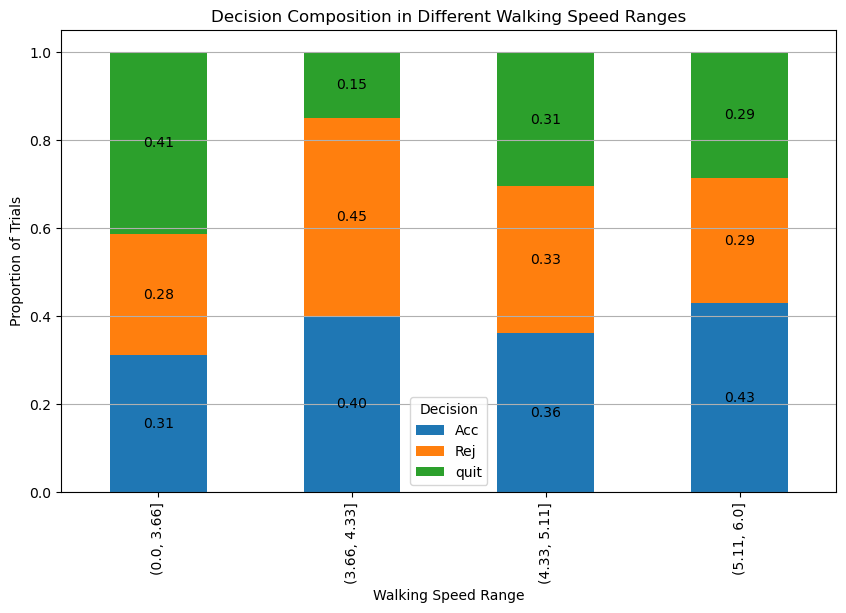

In [ ]:
# Assuming trial_data is your DataFrame with columns 'trial_num', 'decision', and 'walking speed'
trial_data = pd.DataFrame({
    'trial_num': range(134),
    'decision': np.random.choice(['Acc', 'Rej', 'quit'], 134),
    'walking speed': np.random.uniform(3, 6, 134)
})

# Define walking speed bins
speed_bins = [0, 3.66, 4.33, 5.11, 6]
trial_data['speed_bin'] = pd.cut(trial_data['walking speed'], bins=speed_bins)

# Group by speed_bin and decision
grouped_data = trial_data.groupby(['speed_bin', 'decision']).size().unstack(fill_value=0)

# Calculate proportions
proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# Plot the composition of decisions within each walking speed range
ax = proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

# Annotate the bars with proportions
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # Only annotate non-zero heights
        ax.annotate(f'{height:.2f}', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Walking Speed Range')
plt.ylabel('Proportion of Trials')
plt.title('Decision Composition in Different Walking Speed Ranges')
plt.legend(title='Decision')
plt.grid(axis='y')

plt.show()
